# In this project i will be working with 8 csv files containig data of market

First i will be showing you how to visualize the data in a particular file then i will be fetching out the relations between these datas after that i will be providing an estimation of the market with predictive analysis using linear regeression then i will also demonstrate the validity of my model hence created.

#     # Import all the necessary modules

In [1]:
import matplotlib as plt
import sklearn as ski
import pandas as pd
import numpy as np
import seaborn as sea

# These are the basic steps for Exployratory Data Analysis

* Import the necessary Modules like opencv, seaborn, matplotlib etc
* Read  all the CSV files with whatever method you like, I am using readcsv in the Pandas module to do so.
* Explore the data in the CSV file 
* Visualize the data using different types of graphs
* Find relations between datas and plot the heat map, I am using Pearson coefficient Relation for this project.
* If you want you can try do predictive modeling after that, I will be using Linear Regression for the same as of now
* Also remember to find the score of train and test models remember the concept of overfitting and underfitting.
* Lastly you have to validate the model hence created

# Keep viewing the code it can give you a breif idea of simple Data Analysis

* Decleration:- This project is build by me being as a noobie Please keep in mind that i have designed this project according to knowledge whatever i gather. There might be better process out there but i designed it on my own and kept my previous experience in mind. 


# Read the files
Here I am using read csv to read the files, as i am using ,multiple files for reading i will also try to show how to read files isung function or loop in the later parts of the project

In [2]:
dfquote_s = pd.read_csv("../input/stock-market-small-wide-dataset/quote-S.csv")
dfbar_s = pd.read_csv("../input/stock-market-small-wide-dataset/bar-S.csv")
dfbar = pd.read_csv("../input/stock-market-small-wide-dataset/bar.csv")
dfevent = pd.read_csv("../input/stock-market-small-wide-dataset/event.csv")
dfnews = pd.read_csv("../input/stock-market-small-wide-dataset/news.csv")
dfquote = pd.read_csv("../input/stock-market-small-wide-dataset/quote.csv")
dfrating = pd.read_csv("../input/stock-market-small-wide-dataset/rating.csv")
dftarget = pd.read_csv("../input/stock-market-small-wide-dataset/target.csv")


# It's always better to check the file before you start Exploytory Data Analysis.

In [3]:
dfquote.head()

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-08-05 21:57:02+00:00,BDX,284.24,1,283.97,1
1,2020-08-05 20:59:07+00:00,COST,343.60,1,358.23,1
2,2020-08-05 20:58:46+00:00,COST,345.76,2,358.23,1
3,2020-08-05 20:58:25+00:00,COST,345.76,1,358.23,1
4,2020-08-05 20:58:15+00:00,BA,173.30,1,180.63,1


In [4]:
dfquote.tail()

,time,ticker,bid_price,bid_size,ask_price,ask_size
2158859,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.92,30
2158860,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.85,16
2158861,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.98,18
2158862,2020-08-05 13:32:02+00:00,CCL,13.96,29,13.95,14
2158863,2020-08-05 13:30:00+00:00,ABC,98.33,1,108.68,1


In [5]:
dfquote.shape

(2158864, 6)

In [6]:
dfquote.describe(include='all')

,time,ticker,bid_price,bid_size,ask_price,ask_size
count,2158864,2158864,2.158864e+06,2.158864e+06,2.158864e+06,2.158864e+06
unique,22939,180,NaN,NaN,NaN,NaN
top,2020-08-05 19:59:30+00:00,AMD,NaN,NaN,NaN,NaN
freq,1246,283198,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.658060e+02,3.824237e+00,1.678756e+02,5.382434e+00
std,NaN,NaN,4.851936e+02,7.074522e+00,4.913153e+02,1.841143e+01
min,NaN,NaN,3.670000e+00,1.000000e+00,3.810000e+00,1.000000e+00
25%,NaN,NaN,2.901000e+01,1.000000e+00,2.981000e+01,1.000000e+00
50%,NaN,NaN,5.393000e+01,1.000000e+00,5.504000e+01,1.000000e+00
75%,NaN,NaN,8.559000e+01,4.000000e+00,8.625000e+01,4.000000e+00


In [7]:
dfquote.columns.values

array(['time', 'ticker', 'bid_price', 'bid_size', 'ask_price', 'ask_size'],
      dtype=object)

# Always check the Datatypes of the coulumns and rows it will help you discriminate the coulumns and rows according to the datatypes********

In [8]:
dfquote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158864 entries, 0 to 2158863
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   ticker     object 
 2   bid_price  float64
 3   bid_size   int64  
 4   ask_price  float64
 5   ask_size   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 98.8+ MB


In [9]:
dfquote.dtypes

time          object
ticker        object
bid_price    float64
bid_size       int64
ask_price    float64
ask_size       int64
dtype: object

# Check the basic probability of the data

In [10]:
dfquote.describe()

,bid_price,bid_size,ask_price,ask_size
count,2.158864e+06,2.158864e+06,2.158864e+06,2.158864e+06
mean,1.658060e+02,3.824237e+00,1.678756e+02,5.382434e+00
std,4.851936e+02,7.074522e+00,4.913153e+02,1.841143e+01
min,3.670000e+00,1.000000e+00,3.810000e+00,1.000000e+00
25%,2.901000e+01,1.000000e+00,2.981000e+01,1.000000e+00
50%,5.393000e+01,1.000000e+00,5.504000e+01,1.000000e+00
75%,8.559000e+01,4.000000e+00,8.625000e+01,4.000000e+00
max,3.212730e+03,3.050000e+02,4.294670e+03,4.360000e+02


# Fetch the unique values from every columns

In [11]:
dfquote['bid_price'].unique()

array([284.24, 343.6 , 345.76, ..., 153.17, 257.32, 257.15])

In [14]:
dfquote['bid_size'].unique()

array([  1,   2,   5,   3,  12,   4,   6,   8,  19,   7,  32,  10,  25,
        16,  13,  39,   9,  11,  45,  27,  14,  18,  23,  15,  35,  31,
       107,  20,  26,  17,  38,  30,  54,  65,  22,  49,  24,  40,  21,
        34,  33,  44,  28,  29, 131,  51,  61,  57,  53,  42,  52,  56,
        66,  76,  73,  50,  47,  41,  74,  63,  43,  67,  83,  59,  37,
        36,  46,  70,  58,  86,  48,  69,  62,  68,  55,  64,  95,  60,
       109, 114,  89,  88,  71,  90,  87,  80,  77, 163,  78,  75,  85,
        84,  93,  72, 162, 106, 100,  91, 104, 117, 101, 129, 139, 124,
       105, 141,  97, 110,  94,  82,  81, 153,  96, 122, 128, 285, 288,
       143, 126, 281,  92, 280, 279, 103, 278, 283, 287, 277, 276, 134,
       275,  99, 274, 273, 239, 168, 194,  79, 197, 111, 176, 118, 102,
       115, 119, 170, 164, 127, 120, 136, 113, 191, 132, 135, 151,  98,
       108, 305, 295, 255, 205, 112, 130, 172, 116, 235, 144, 300, 123,
       158, 140, 150, 173, 184, 160, 180, 204, 254, 256, 206, 15

In [15]:
dfquote['ask_price'].unique()

array([283.97, 358.23, 180.63, ...,  71.59, 118.3 , 244.74])

In [16]:
dfquote['ask_size'].unique()

array([  1,   4,  15,   6,   2,   9,  13,   3,  18,  11,  10,  23,  12,
        14,   5,  25,   8,  21,   7,  22,  38,  27,  17,  26, 200,  19,
        30,  39,  16,  35,  31,  28,  20,  34,  37,  48,  64,  50,  49,
        46,  43,  44, 250,  66,  29,  45,  33,  65,  32,  24,  54,  41,
        40,  63, 149,  57,  75,  56,  61, 131,  62,  74,  36,  84,  87,
        77,  53,  52,  76,  83,  98,  71,  55,  42,  69,  67,  47,  70,
        68,  90,  88,  51,  59,  73,  82,  60,  86, 154, 173, 183,  81,
       306, 197, 136, 418, 133, 329, 330, 113,  93, 335, 284,  58, 125,
        97, 289,  94, 189, 152, 150,  78,  95, 179, 182, 145, 147,  80,
       114, 102, 104,  79, 118, 103, 140, 127,  91, 110,  89,  85, 105,
       100,  99,  92, 124, 112, 106, 116, 117,  96, 148, 146, 111, 260,
       258, 222, 229, 256, 255, 254, 253, 252, 248, 242, 246, 237,  72,
       101, 216, 215, 214, 213, 218, 212, 223, 210, 199, 134, 120, 107,
       108, 436, 109, 129, 138, 141, 144, 163, 159, 158, 139, 11

# Check if there is any null values

In [17]:
dfquote.isnull().sum()

time         0
ticker       0
bid_price    0
bid_size     0
ask_price    0
ask_size     0
dtype: int64

In [18]:
dfquote.isnull().sum()>0

time         False
ticker       False
bid_price    False
bid_size     False
ask_price    False
ask_size     False
dtype: bool

# This step is unnecessary still i am including if you are working with any other data file please consider these types if you like.

In [ ]:
#total = dfquote.isnull().sum().sort_values(ascending=False)
#percent = (dfquote.isnull().sum()/dfquote.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data

In [19]:
#dfquote['time'] = dfquote['time'].replace(np.nan, 0)
#dfquote['ticker'] = dfquote['ticker'].replace(np.nan, 0)
#dfquote['bid_price'] = dfquote['bid_price'].replace(np.nan, 0)
#dfquote['bid_size'] = dfquote['bid_size'].replace(np.nan, 0)
#dfquote['ask_price'] = dfquote['ask_price'].replace(np.nan, 0)

# Need to convert the time in datetime formate so that we can work upon it

In [20]:
dfquote['time'] = pd.to_datetime(dfquote['time'])
dfquote.head()

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,2020-08-05 21:57:02+00:00,BDX,284.24,1,283.97,1
1,2020-08-05 20:59:07+00:00,COST,343.60,1,358.23,1
2,2020-08-05 20:58:46+00:00,COST,345.76,2,358.23,1
3,2020-08-05 20:58:25+00:00,COST,345.76,1,358.23,1
4,2020-08-05 20:58:15+00:00,BA,173.30,1,180.63,1


# As from the above data you can see that the Time column changes per hour hence we are going to work only with time per hour

In [21]:
dfquote['time'] = dfquote['time'].dt.hour
dfquote.head()

,time,ticker,bid_price,bid_size,ask_price,ask_size
0,21,BDX,284.24,1,283.97,1
1,20,COST,343.60,1,358.23,1
2,20,COST,345.76,2,358.23,1
3,20,COST,345.76,1,358.23,1
4,20,BA,173.30,1,180.63,1


# Visualization 

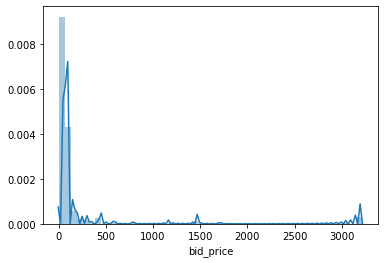

In [23]:
sea.distplot(dfquote['bid_price'])

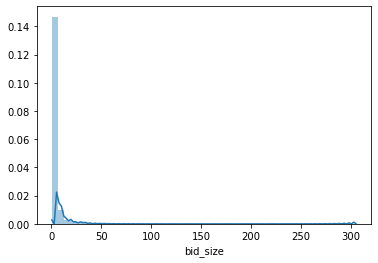

In [24]:
sea.distplot(dfquote['bid_size'])

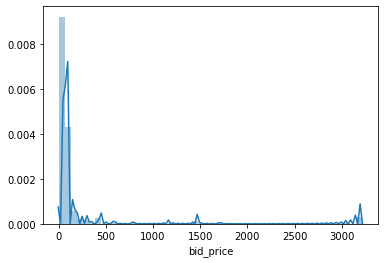

In [25]:
sea.distplot(dfquote['bid_price'])

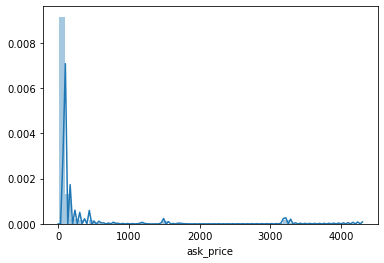

In [26]:
sea.distplot(dfquote['ask_price'])

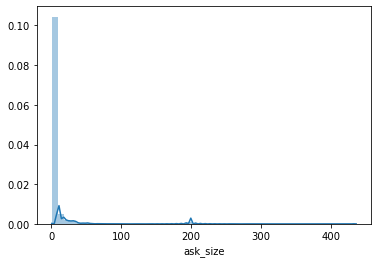

In [27]:
sea.distplot(dfquote['ask_size'])

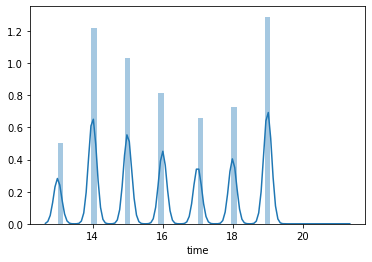

In [28]:
sea.distplot(dfquote['time'])

(-0.5, 8.5, 0.0, 800000.0)

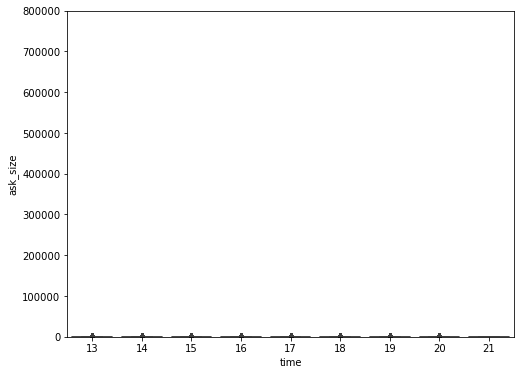

In [31]:
f, ax = plt.pyplot.subplots(figsize=(8, 6))
fig = sea.boxplot(x='time', y="ask_size", data=dfquote)
fig.axis(ymin=0, ymax=800000)

(-0.5, 8.5, 0.0, 800000.0)

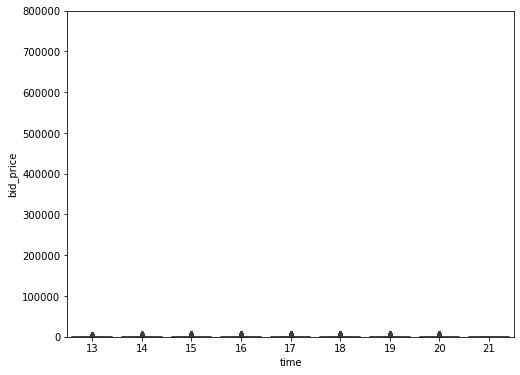

In [33]:
f, ax = plt.pyplot.subplots(figsize=(8, 6))
fig = sea.boxplot(x='time', y="bid_price", data=dfquote)
fig.axis(ymin=0, ymax=800000)

(-0.5, 8.5, 0.0, 800000.0)

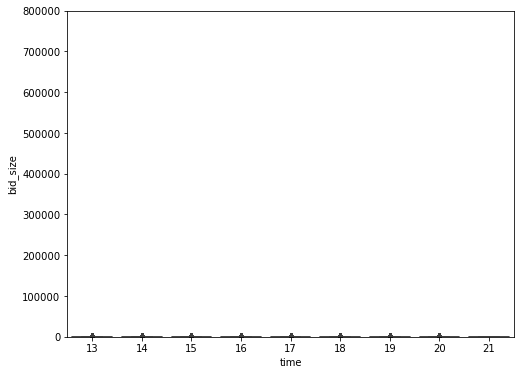

In [34]:
f, ax = plt.pyplot.subplots(figsize=(8, 6))
fig = sea.boxplot(x='time', y="bid_size", data=dfquote)
fig.axis(ymin=0, ymax=800000)

(-0.5, 8.5, 0.0, 800000.0)

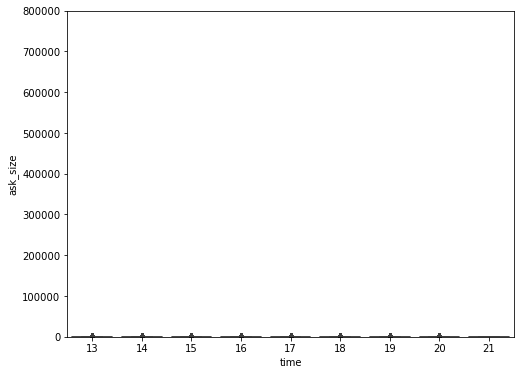

In [35]:
f, ax = plt.pyplot.subplots(figsize=(8, 6))
fig = sea.boxplot(x='time', y="ask_size", data=dfquote)
fig.axis(ymin=0, ymax=800000)

![](http://)bid_price	bid_size	ask_price	ask_size

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


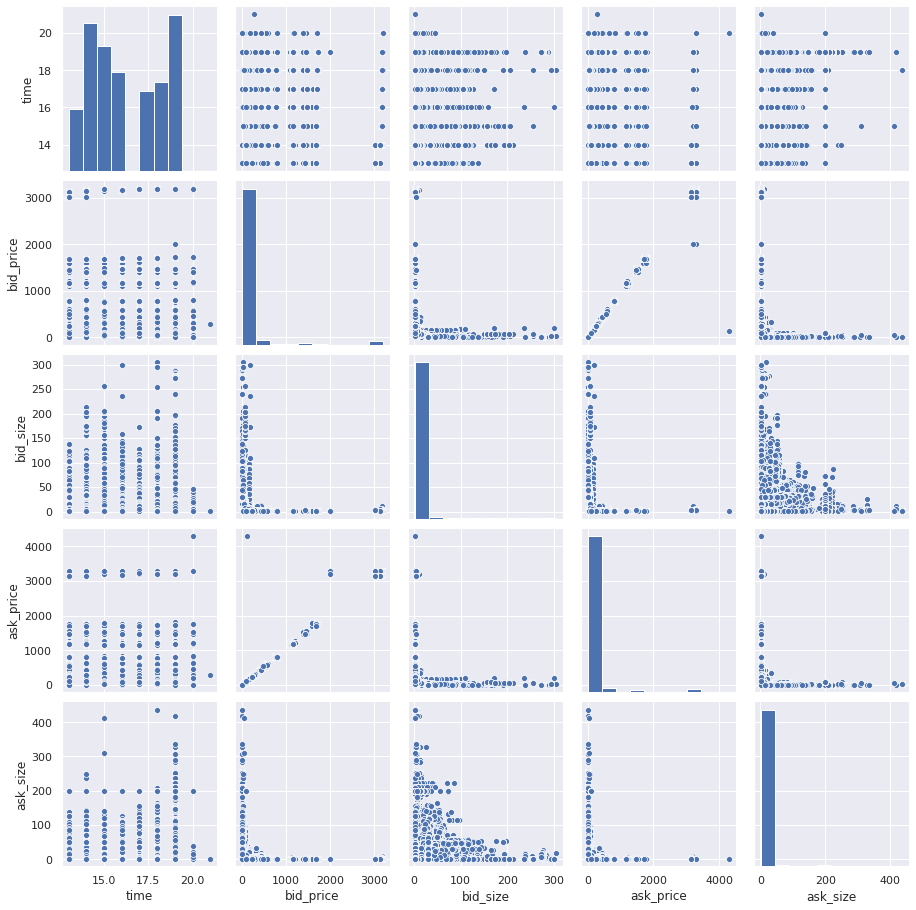

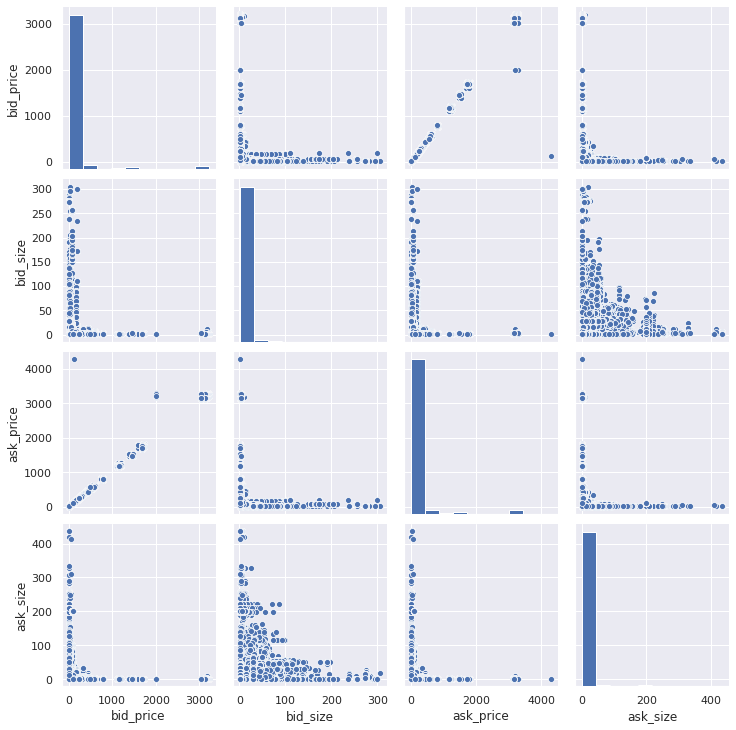

In [37]:
sea.pairplot(dfquote)
sea.set()
cols = ['bid_price', 'bid_size', 'ask_price', 'ask_size']
sea.pairplot(dfquote[cols], size = 2.5)
plt.pyplot.show()

In [38]:
hourly_bid_price= dfquote.groupby("time")["bid_price"].sum().sort_values(ascending=False).to_frame()
hourly_bid_price.head()

,bid_price
time,
19,7.334921e+07
14,6.463886e+07
15,5.590663e+07
18,4.934874e+07
16,4.616001e+07


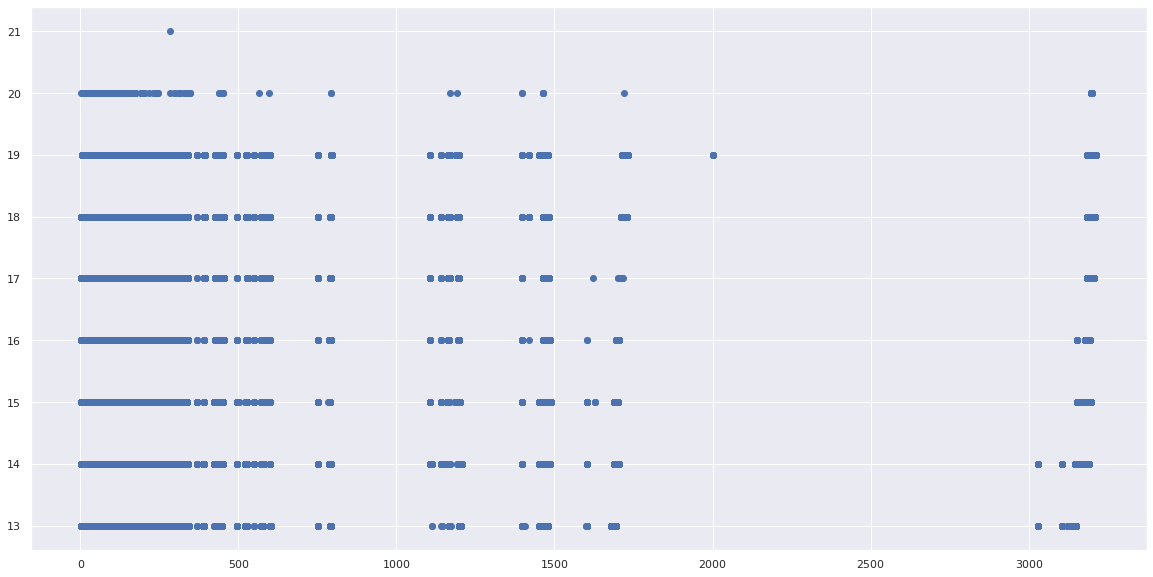

In [39]:
plt.pyplot.figure(figsize=(20,10))
x = dfquote['bid_price']
y = dfquote['time']
plt.pyplot.scatter(x,y)

In [40]:
hourly_bid_size= dfquote.groupby("time")["bid_size"].sum().sort_values(ascending=False).to_frame()
hourly_bid_size.head()

,bid_size
time,
19,1789414
14,1522077
15,1270314
18,1073626
16,1005129


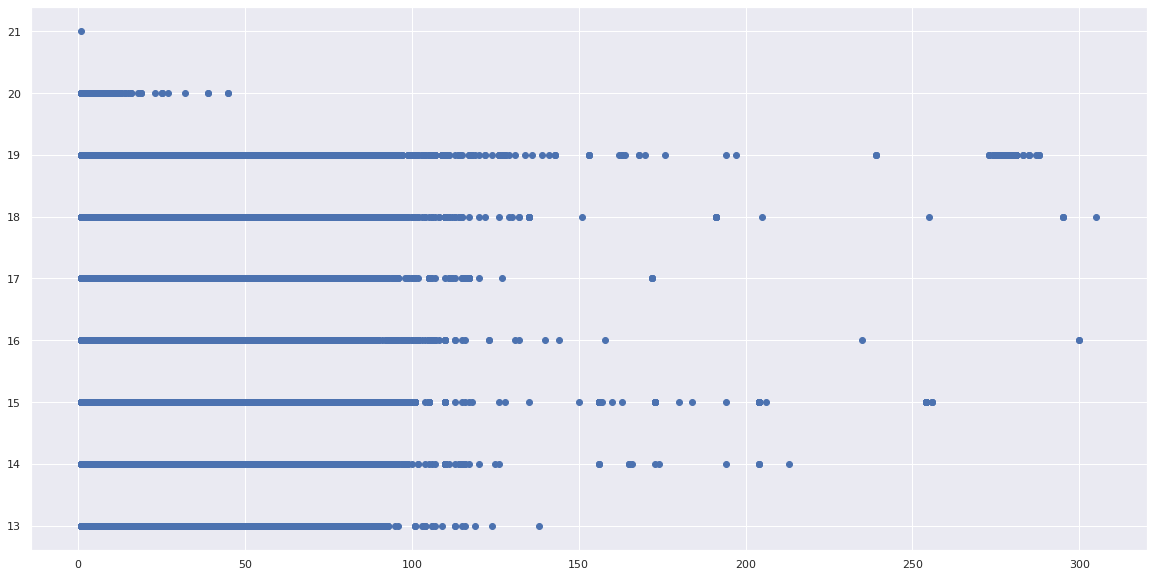

In [41]:
plt.pyplot.figure(figsize=(20,10))
x = dfquote['bid_size']
y = dfquote['time']
plt.pyplot.scatter(x,y)

In [42]:
hourly_ask_price= dfquote.groupby("time")["ask_price"].sum().sort_values(ascending=False).to_frame()
hourly_ask_price.head()

,ask_price
time,
19,7.393252e+07
14,6.569713e+07
15,5.698372e+07
18,4.981633e+07
16,4.662744e+07


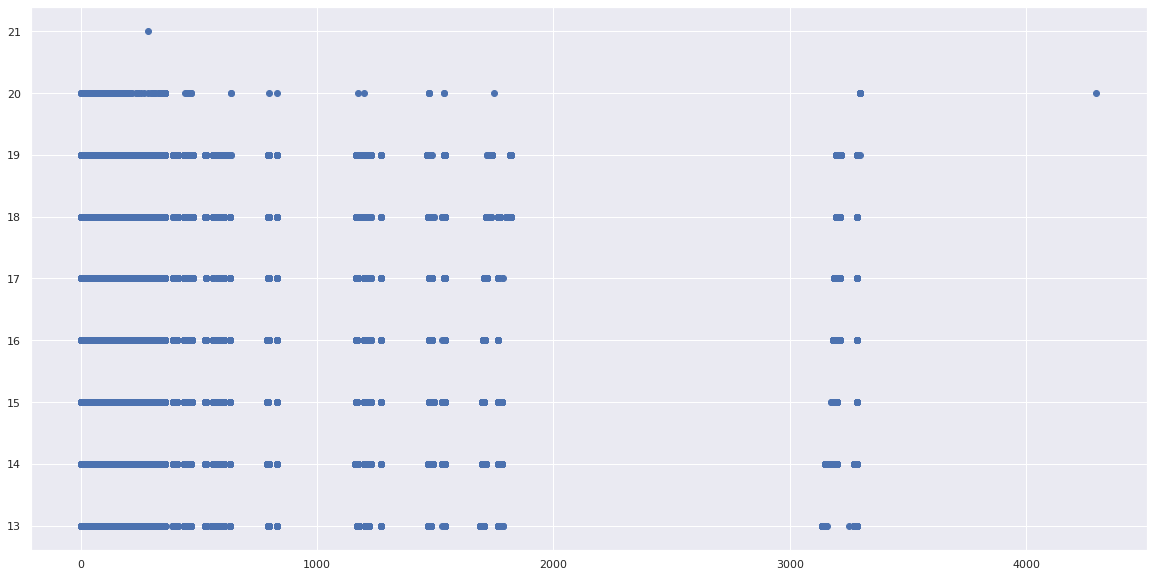

In [43]:
plt.pyplot.figure(figsize=(20,10))
x = dfquote['ask_price']
y = dfquote['time']
plt.pyplot.scatter(x,y)

In [44]:
pearson_coefficeint = dfquote.corr(method='pearson')
pearson_coefficeint

,time,bid_price,bid_size,ask_price,ask_size
time,1.000000,0.022677,0.015829,0.021371,0.015751
bid_price,0.022677,1.000000,-0.091375,0.999788,-0.053887
bid_size,0.015829,-0.091375,1.000000,-0.091417,0.101139
ask_price,0.021371,0.999788,-0.091417,1.000000,-0.053408
ask_size,0.015751,-0.053887,0.101139,-0.053408,1.000000


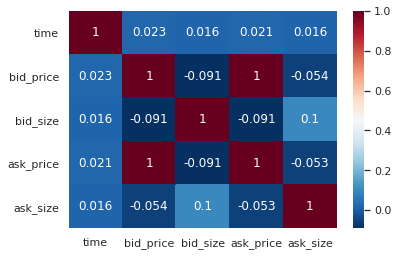

In [45]:
sea.heatmap(pearson_coefficeint, cmap='RdBu_r',annot=True)

(0.0, 3373.183)

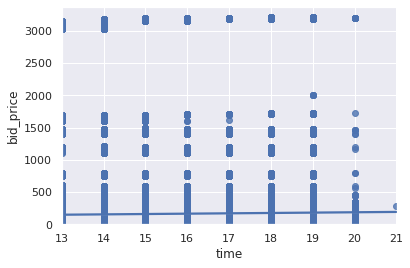

In [47]:
sea.regplot(x= "time",y="bid_price", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 320.2)

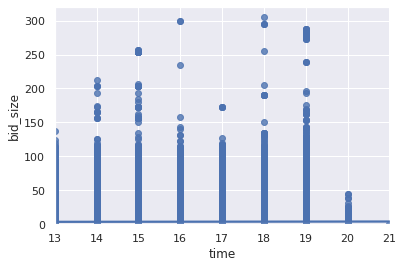

In [48]:
sea.regplot(x= "time",y="bid_size", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 4509.213)

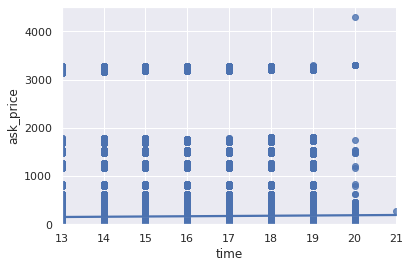

In [49]:
sea.regplot(x= "time",y="ask_price", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 4509.213)

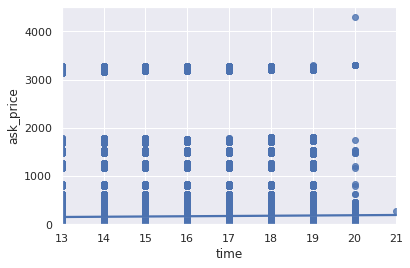

In [50]:
sea.regplot(x= "time",y="ask_price", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 4509.217609997487)

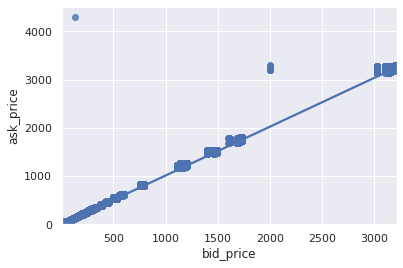

In [46]:
sea.regplot(x= "bid_price",y="ask_size", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 4509.217648956364)

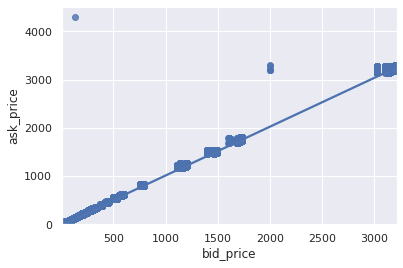

In [52]:
sea.regplot(x= "bid_price",y="ask_price", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 457.8433454197781)

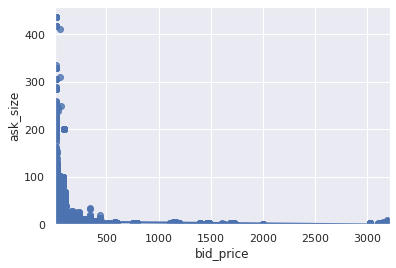

In [53]:
sea.regplot(x= "bid_price",y="ask_size", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 457.84331046067075)

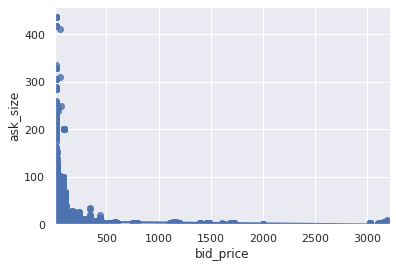

In [54]:
sea.regplot(x= "bid_price",y="ask_size", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 457.8433210579397)

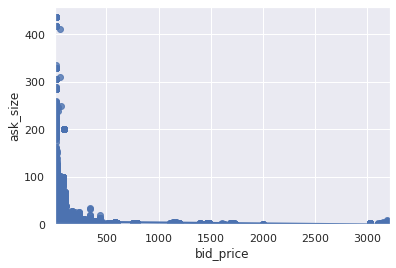

In [55]:
sea.regplot(x= "bid_price",y="ask_size", data = dfquote)
plt.pyplot.ylim(0)

(0.0, 457.8433797173199)

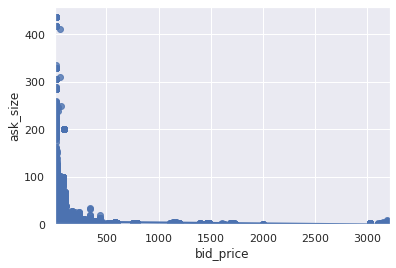

In [56]:
sea.regplot(x= "bid_price",y="ask_size", data = dfquote)
plt.pyplot.ylim(0)

Text(0, 0.5, 'ask_price')

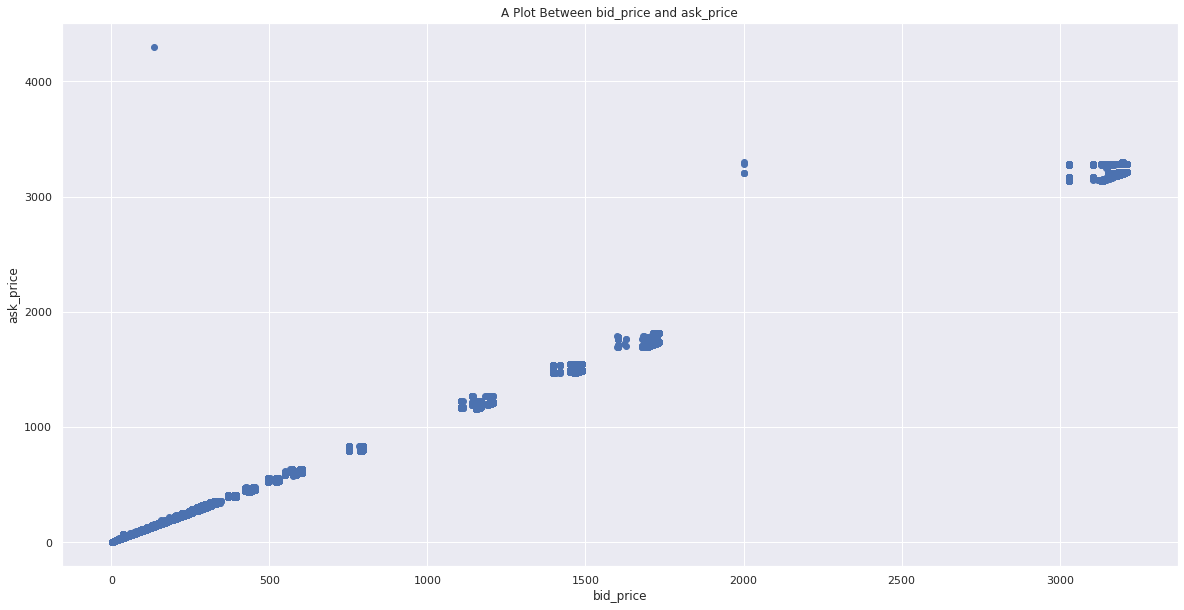

In [51]:
plt.pyplot.figure(figsize=(20,10))
x = dfquote['bid_price']
y = dfquote['ask_price']
plt.pyplot.scatter(x,y)
plt.pyplot.title("A Plot Between bid_price and ask_price")
plt.pyplot.xlabel("bid_price")
plt.pyplot.ylabel("ask_price")

Text(0, 0.5, 'ask_price')

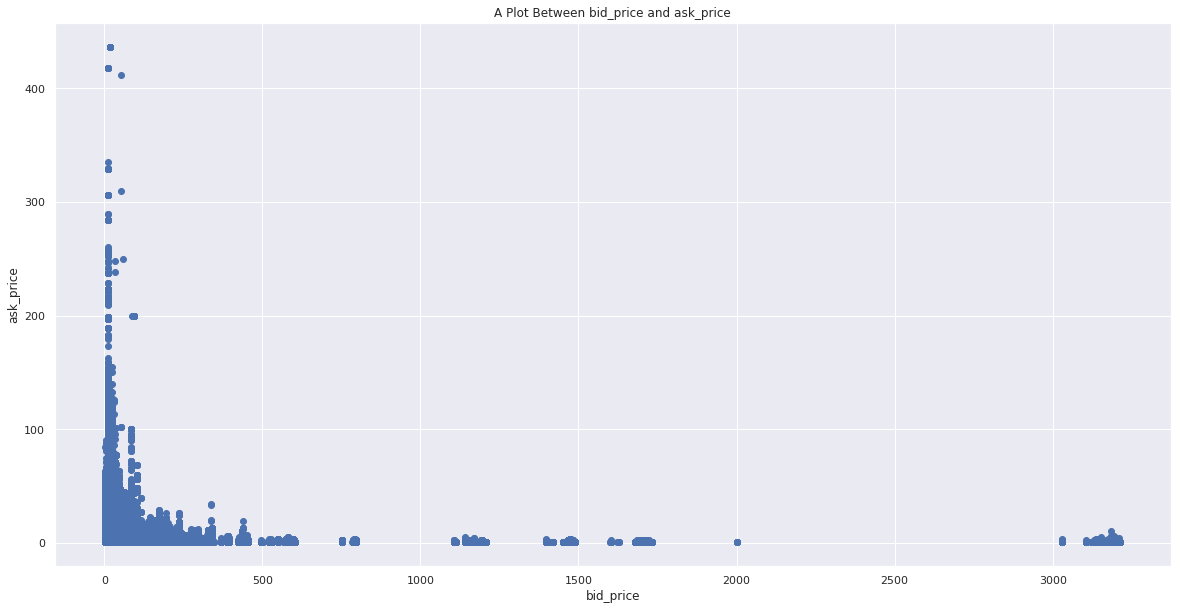

In [57]:
plt.pyplot.figure(figsize=(20,10))
x = dfquote['bid_price']
y = dfquote['ask_size']
plt.pyplot.scatter(x,y)
plt.pyplot.title("A Plot Between bid_price and ask_size")
plt.pyplot.xlabel("bid_price")
plt.pyplot.ylabel("ask_size")

Text(0, 0.5, 'ask_price')

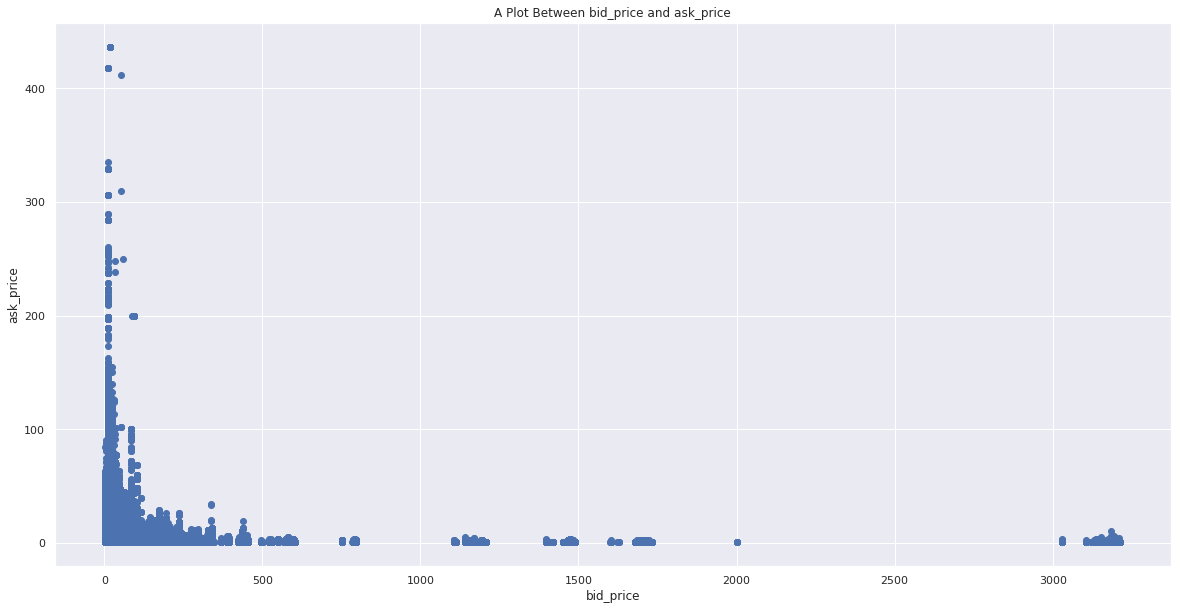

In [58]:
plt.pyplot.figure(figsize=(20,10))
x = dfquote['bid_price']
y = dfquote['ask_price']
plt.pyplot.scatter(x,y)
plt.pyplot.title("A Plot Between bid_price and ask_price")
plt.pyplot.xlabel("bid_price")
plt.pyplot.ylabel("ask_price")

Text(0, 0.5, 'time')

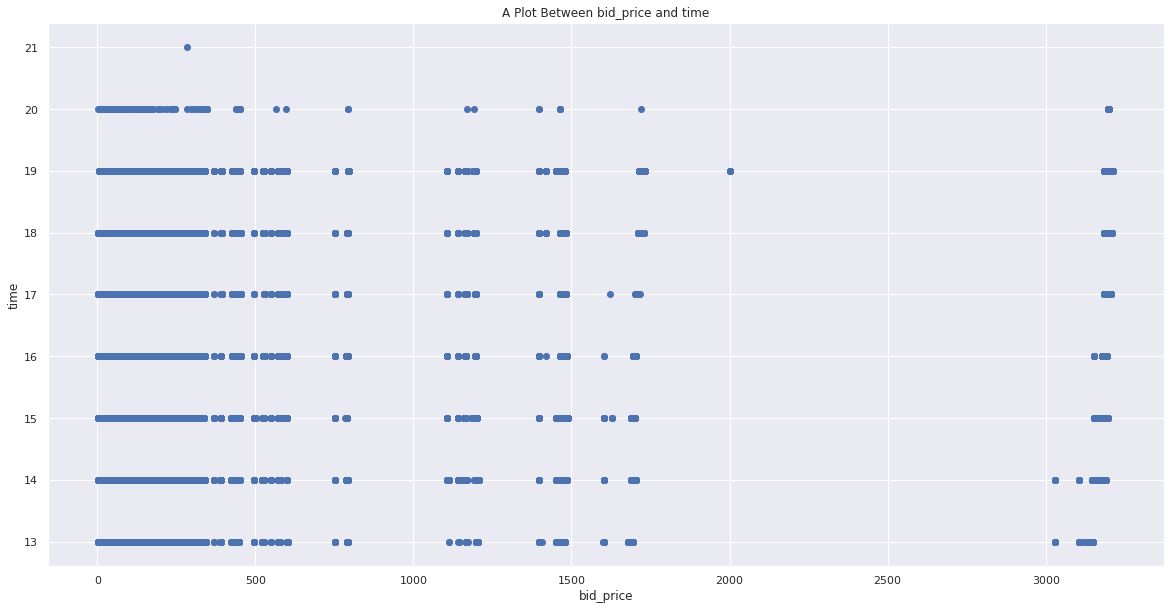

In [61]:
plt.pyplot.figure(figsize=(20,10))
x = dfquote['bid_price']
y = dfquote['time']
plt.pyplot.scatter(x,y)
plt.pyplot.title("A Plot Between bid_price and time")
plt.pyplot.xlabel("bid_price")
plt.pyplot.ylabel("time")

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = dfquote[['bid_price','ask_size']]
y = dfquote['bid_size']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [91]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1727091, 2) (431773, 2) (1727091,) (431773,)


In [92]:
x_train.head(20)

,bid_price,ask_size
1200610,59.57,2
1034460,85.44,6
216479,26.42,10
1182218,26.06,7
1171694,93.82,1
135772,94.95,6
902839,84.94,5
1012189,16.68,1
2005266,19.48,2
1134746,13.95,1


In [93]:
y_train.head(20)

1200610     1
1034460     6
216479      9
1182218     2
1171694     1
135772      1
902839      9
1012189     3
2005266     3
1134746    15
26473       3
879749      1
1632613     6
430606      8
1689019     1
898227      5
1442805     5
726252      1
1278511     6
1874157     1
Name: bid_size, dtype: int64

In [94]:
x_test.head(20)

,bid_price,ask_size
1672558,84.91,12
1331645,85.25,9
56058,38.70,1
407626,12.75,8
131098,85.04,4
761973,1473.38,1
553849,16.63,2
684572,56.81,1
1198576,25.44,1
1567713,3186.36,1


In [95]:
y_test.head(20)

1672558     1
1331645     5
56058       1
407626      1
131098      1
761973      1
553849      3
684572      1
1198576     1
1567713     1
1077948     1
204581      1
1303988     1
1278274     4
918383      1
1765780     6
291197      1
120015     10
1155321     1
795584     23
Name: bid_size, dtype: int64

In [96]:
LR=LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [97]:
LR.predict(x_test)

array([4.17375911, 4.06098197, 3.81991351, ..., 3.83657366, 3.83734065,
       3.78336178])

In [98]:
LR.score(x_test, y_test)

0.01695786580894909

In [ ]:
dfbar.head()


In [ ]:
dfevent.head()


In [ ]:
dfnews.head()


In [ ]:
dfquote_s.head()


In [ ]:
dfquote.head()


In [ ]:
dfrating.head()


In [ ]:
dftarget.head()